In [ ]:
%pylab inline

import numpy as np
import pandas as pd
import seaborn as sns

from google.colab import files

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

Populating the interactive namespace from numpy and matplotlib


In [ ]:
uploaded = files.upload()

Saving cars.csv to cars (2).csv


In [ ]:
df = pd.read_csv('cars.csv')

In [ ]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [ ]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [ ]:
df['cubicinches'] = pd.to_numeric(df['cubicinches'], errors='coerce')
df['weightlbs'] = pd.to_numeric(df['weightlbs'], errors='coerce')
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

In [ ]:
df[df['cubicinches'].isnull()]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
40,16.0,6,NaN,105,3897.0,19,1976,US.
180,19.8,6,NaN,85,2990.0,18,1980,US.


In [ ]:
df.isnull().sum().sum()

5

In [ ]:
df['cubicinches'].fillna(df['cubicinches'].mean(), inplace=True)
df['weightlbs'].fillna(df['weightlbs'].mean(), inplace=True)
df.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


In [ ]:
df.mpg.median()

22.0

In [ ]:
df.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


In [ ]:
df[['cylinders', 'mpg']].corr()

,cylinders,mpg
cylinders,1.00000,-0.77671
mpg,-0.77671,1.00000


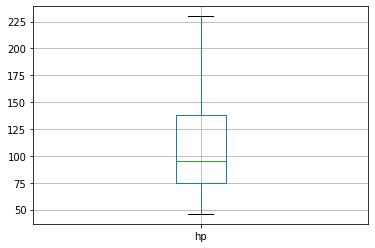

In [ ]:
df.boxplot(['hp'])

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(df_scaler[['hp']]).max()

3.05870398977614

In [ ]:
df_scaler['hp'].max()

3.05870398977614

In [ ]:
pca = PCA(n_components=7)
pca.fit_transform(df_scaler)
pca.explained_variance_ratio_[0]

0.7237134885896341

In [ ]:
model = KMeans(n_clusters=3,random_state=42)
model.fit(df_scaler.iloc[:,:3])
np.array(model.cluster_centers_)

array([[ 0.78510642, -0.90576545, -0.8462471 ],
       [-1.03776954,  1.39305285,  1.3699381 ],
       [-0.43269855,  0.23697401,  0.12976368]])

In [ ]:
df_models = df.copy()
df_models['new_mpg'] = np.where(df['mpg'] > 25, 1, 0)
df_models.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,new_mpg
0,14.0,8,350.0,165,4209.0,12,1972,US.,0
1,31.9,4,89.0,71,1925.0,14,1980,Europe.,1
2,17.0,8,302.0,140,3449.0,11,1971,US.,0
3,15.0,8,400.0,150,3761.0,10,1971,US.,0
4,30.5,4,98.0,63,2051.0,17,1978,US.,1


In [ ]:
y = cars_models['new_mpg']
X = cars_models['cylinders cubicinches hp weightlbs time-to-60'.split()]
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [ ]:
model = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score)

0.8734177215189873


In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87        41
           1       0.82      0.95      0.88        38

    accuracy                           0.87        79
   macro avg       0.88      0.88      0.87        79
weighted avg       0.88      0.87      0.87        79



In [ ]:
confusion_matrix(y_test, preds)

array([[33,  8],
       [ 2, 36]])

In [ ]:
model = LogisticRegression(random_state=42).fit(X_train, y_train)
model.score(X_test, y_test)

0.8607594936708861